In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import csv
import pandas as pd
import re
from colorama import Fore,Style
np.set_printoptions(precision=3, suppress=True)

In [2]:
file_path = 'supermarket_sales_vn.csv'

row_list = []
with open (file_path, newline='', encoding='utf8') as input_file:
	data_file =  csv.reader(input_file, delimiter=',')
	header = next(data_file)
	for row in data_file:
		row_list.append(row)


In [89]:
# bước này mình chuyển : thành chấm để chuyển nó thành dạng float để so sánh với thời gian, hơi thủ công ^^
time_list = []
time = [row[10] for row in row_list]
for i in range(len(time)):
    time_list.append(float(re.sub("[:]", ".", time[i])))
time_list[0:10]
for time in time_list[0:10]:
    print(float(time))

13.08
10.29
13.23
20.33
10.37
18.3
14.36
11.38
17.15
13.27


# # $\color{red}{\text{BÀI 6}}$



# a. Khung giờ bán được nhiều đơn nhất

In [90]:
quantity_list = np.array([int(row[6]) for row in row_list])
hour_list = []
quantity_time = []
for i in range(24):
    hour_list.append(i)
print('hour list',hour_list)

for idx,hour in enumerate(hour_list):
    hour = []
    quantity_time.append(hour)
    
print('quantity time',quantity_time)
print(np.shape(quantity_time))
i=0
for idx,hour in enumerate(hour_list):
    for time in time_list:
        if ((float(time)>hour) and (float(time)<hour+1)):
            quantity_time[idx].append(quantity_list[i])
            i=i+1
 

hour list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
quantity time [[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
(24, 0)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 573, 582, 465, 552, 410, 548, 389, 399, 514, 623, 374, 0.0, 0.0, 0.0]


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_22020/1254783236.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  quantity_time = np.array(quantity_time)


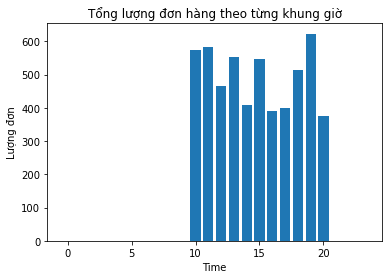

Khung thời gian có nhiều đơn hàng nhất từ 19 tới 20


In [91]:
sum_quantity_time = []
quantity_time = np.array(quantity_time)
for idx in range(len(hour_list)):
    sum_quantity_time.append(np.sum(quantity_time[idx]))
print(sum_quantity_time)
plt.bar(x=hour_list,height=sum_quantity_time)
plt.title('Tổng lượng đơn hàng theo từng khung giờ')
plt.xlabel('Time')
plt.ylabel('Lượng đơn')
plt.show()

max_idx = int(np.argmax(sum_quantity_time))
print(f"Khung thời gian có nhiều đơn hàng nhất từ {hour_list[max_idx]} tới {hour_list[max_idx+1]}")

# Khung giờ có doanh thu cao nhất

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 35940.156, 35597.225999999995, 26171.018999999997, 30816.218999999997, 21988.092, 30185.641499999998, 25413.696000000004, 23450.7945, 30471.125999999997, 33688.1055, 23573.277, 0.0, 0.0, 0.0]


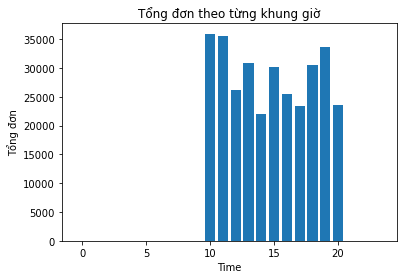

Khung thời gian có tổng đơn cao nhất từ 10 tới 11


In [92]:
total_list = [float(row[8]) for row in row_list]
hour_list = []
total_time = []
for i in range(24):
    hour_list.append(i)
for idx,hour in enumerate(hour_list):
    hour = []
    total_time.append(hour)
i=0
for idx,hour in enumerate(hour_list):
    for time in time_list:
        if ((time>hour) and (time<hour+1)):
            total_time[idx].append(total_list[i])
            i=i+1
            
sum_total_time = []
for idx in range(len(hour_list)):
    sum_total_time.append(np.sum(total_time[idx]))
print(sum_total_time)
plt.bar(x=hour_list,height=sum_total_time)
plt.title('Tổng đơn theo từng khung giờ')
plt.xlabel('Time')
plt.ylabel('Tổng đơn')
plt.show()

max_idx = int(np.argmax(sum_total_time))
print(f"Khung thời gian có tổng đơn cao nhất từ {hour_list[max_idx]} tới {hour_list[max_idx+1]}")

# Top5 mặt hàng được bán nhiều nhất theo số lượng 

In [93]:
loai_san_pham = np.unique([row[4] for row in row_list])
list_sp = [] # lưu theo phân loại sản phẩm
for idx,name in enumerate(loai_san_pham):
    name = []
    list_sp.append(name)
for idx,name in enumerate(loai_san_pham):
    list_sp[idx].append([int(row[6]) for row in row_list if row [4] == name])
quantity_theo_sp = []
for idx,name in enumerate(loai_san_pham):
    quantity_theo_sp.append(np.sum(list_sp[idx]))
top5_idx = np.lexsort([loai_san_pham,quantity_theo_sp])[::-1][0:5]
quantity_theo_sp = np.array(quantity_theo_sp)
loai_san_pham = np.array(loai_san_pham)
quantity_theo_sp = pd.Series(data=quantity_theo_sp[top5_idx],dtype=float,name='Top5 số lượng đơn theo loại sản phẩm',
                             index=loai_san_pham[top5_idx])
quantity_theo_sp 

Electronic accessories    971.0
Food and beverages        952.0
Sports and travel         920.0
Home and lifestyle        911.0
Fashion accessories       902.0
Name: Top5 số lượng đơn theo loại sản phẩm, dtype: float64

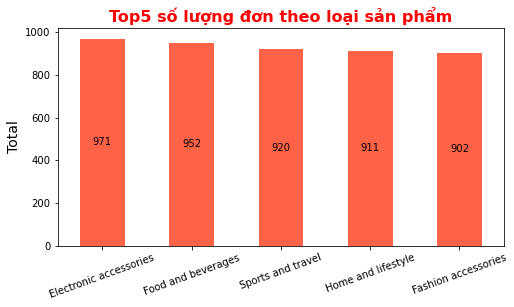

In [94]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
quantity_theo_sp.plot(ax=ax,kind='bar',rot=20,color='tomato')
ax.bar_label(container = ax.containers[0],label_type='center')
ax.set_ylabel('Total',fontsize=14)
ax.set_title('Top5 số lượng đơn theo loại sản phẩm',fontsize=16,weight='bold',color='r')
plt.show()

# Top5 mặt hàng có doanh thu cao nhất

In [95]:
loai_san_pham = np.unique([row[4] for row in row_list])
list_sp = [] # lưu theo phân loại sản phẩm
for idx,name in enumerate(loai_san_pham):
    name = []
    list_sp.append(name)
for idx,name in enumerate(loai_san_pham):
    list_sp[idx].append([float(row[8]) for row in row_list if row [4] == name])
total_theo_sp = []
for idx,name in enumerate(loai_san_pham):
    total_theo_sp.append(np.sum(list_sp[idx]))
top5_idx = np.lexsort([loai_san_pham,total_theo_sp])[::-1][0:5]
total_theo_sp = np.array(total_theo_sp)
loai_san_pham = np.array(loai_san_pham)
total_theo_sp = pd.Series(data=total_theo_sp[top5_idx],dtype=float,name='Top5 mặt hàng có doanh thu cao nhất',
                             index=loai_san_pham[top5_idx])
total_theo_sp 

Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Name: Top5 mặt hàng có doanh thu cao nhất, dtype: float64

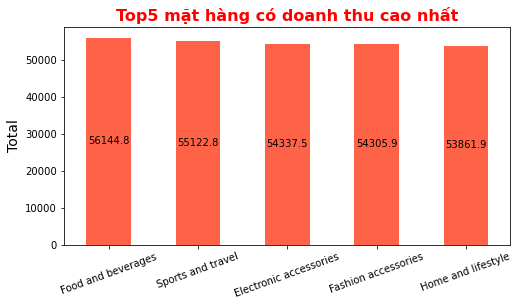

In [96]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
total_theo_sp.plot(ax=ax,kind='bar',rot=20,color='tomato')
ax.bar_label(container = ax.containers[0],label_type='center')
ax.set_ylabel('Total',fontsize=14)
ax.set_title('Top5 mặt hàng có doanh thu cao nhất',fontsize=16,weight='bold',color='r')
plt.show()

# # $\color{red}{\text{BÀI 7}}$



# Giá và rating

In [97]:
rating = np.array([row[13] for row in row_list],dtype=float)

In [98]:
price = np.array([row[5] for row in row_list],dtype=float)

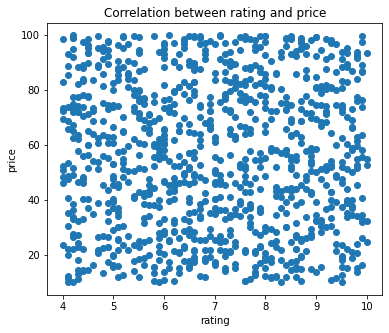

In [99]:
fig, ax = plt.subplots(figsize=(6,5), num=1)
ax.scatter(rating,price)
plt.xlabel('rating')
plt.ylabel('price')
plt.title('Correlation between rating and price')
plt.show()

In [100]:
coeff = np.corrcoef(rating,price)
print(coeff)

[[ 1.    -0.009]
 [-0.009  1.   ]]


In [101]:
print('Ít tương quan giữa giá và rating')

Ít tương quan giữa giá và rating


# Số lượng và rating

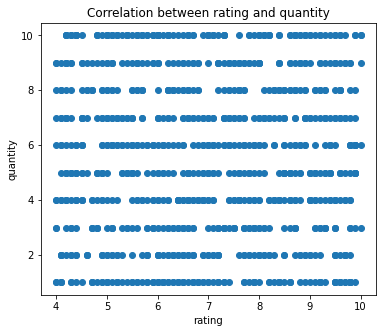

In [102]:
quantity = np.array([row[6] for row in row_list],dtype=float)
fig, ax = plt.subplots(figsize=(6,5), num=1)
ax.scatter(rating,quantity)
plt.xlabel('rating')
plt.ylabel('quantity')
plt.title('Correlation between rating and quantity')
plt.show()

In [103]:
coeff = np.corrcoef(rating,quantity)
print(coeff)

[[ 1.    -0.016]
 [-0.016  1.   ]]


In [104]:
print('Ít tương quan giữa giá và rating')

Ít tương quan giữa giá và rating


# Tổng đơn và rating

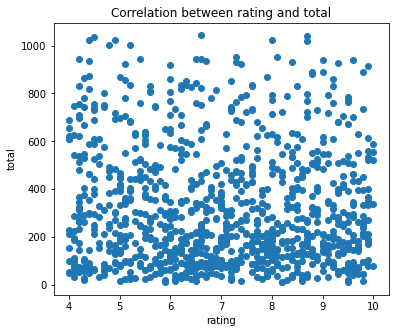

In [105]:
total = np.array([row[8] for row in row_list],dtype=float)
fig, ax = plt.subplots(figsize=(6,5), num=1)
ax.scatter(rating,total)
plt.xlabel('rating')
plt.ylabel('total')
plt.title('Correlation between rating and total')
plt.show()

In [106]:
coeff = np.corrcoef(rating,total)
print(coeff)

[[ 1.    -0.036]
 [-0.036  1.   ]]


In [107]:
print('Ít tương quan giữa tổng đơn và rating')

Ít tương quan giữa tổng đơn và rating
